<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-1" data-toc-modified-id="1-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1-1</a></span><ul class="toc-item"><li><span><a href="#(a)" data-toc-modified-id="(a)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>(a)</a></span></li><li><span><a href="#(b)" data-toc-modified-id="(b)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>(b)</a></span></li><li><span><a href="#(c)" data-toc-modified-id="(c)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>(c)</a></span></li><li><span><a href="#(d)" data-toc-modified-id="(d)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>(d)</a></span></li></ul></li><li><span><a href="#1-2" data-toc-modified-id="1-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>1-2</a></span><ul class="toc-item"><li><span><a href="#(a)" data-toc-modified-id="(a)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>(a)</a></span></li><li><span><a href="#(b)" data-toc-modified-id="(b)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>(b)</a></span></li><li><span><a href="#(c)" data-toc-modified-id="(c)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>(c)</a></span></li><li><span><a href="#(d)" data-toc-modified-id="(d)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>(d)</a></span></li></ul></li><li><span><a href="#1-3" data-toc-modified-id="1-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>1-3</a></span><ul class="toc-item"><li><span><a href="#(a)" data-toc-modified-id="(a)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>(a)</a></span></li><li><span><a href="#(b)" data-toc-modified-id="(b)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>(b)</a></span></li></ul></li><li><span><a href="#1-4" data-toc-modified-id="1-4-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>1-4</a></span><ul class="toc-item"><li><span><a href="#(a)" data-toc-modified-id="(a)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>(a)</a></span></li><li><span><a href="#(b)" data-toc-modified-id="(b)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>(b)</a></span></li></ul></li><li><span><a href="#1-5" data-toc-modified-id="1-5-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>1-5</a></span><ul class="toc-item"><li><span><a href="#(a)" data-toc-modified-id="(a)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>(a)</a></span></li><li><span><a href="#(b)" data-toc-modified-id="(b)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>(b)</a></span></li><li><span><a href="#(c)" data-toc-modified-id="(c)-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>(c)</a></span></li><li><span><a href="#(d)" data-toc-modified-id="(d)-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>(d)</a></span></li></ul></li></ul></div>

In [1]:
print(R.version)

               _                           
platform       x86_64-apple-darwin13.4.0   
arch           x86_64                      
os             darwin13.4.0                
system         x86_64, darwin13.4.0        
status                                     
major          4                           
minor          3.1                         
year           2023                        
month          06                          
day            16                          
svn rev        84548                       
language       R                           
version.string R version 4.3.1 (2023-06-16)
nickname       Beagle Scouts               


# 1-1

In [2]:
install.packages("fBasics")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
require(fBasics)

Loading required package: fBasics



In [11]:
print(getwd())

[1] "/Users/karlzhang/OneDrive/Other/Live_Courses/BitTiger/Alg_Practice/QR/AFTS_code/Ch1"


In [3]:
da = read.table("../AFTS_sol/data/d-3stocks9908.txt", header = T)
da[1:5,]

,date,axp,cat,sbux
,<int>,<dbl>,<dbl>,<dbl>
1,19990104,-0.009756,0.029891,-0.040089
2,19990105,-0.019089,-0.002639,-0.034803
3,19990106,0.043063,0.026455,-0.008413
4,19990107,0.012063,0.009021,0.003636
5,19990108,0.030393,0.042146,0.021739


In [4]:
rtn = da[, 2:4]

## (a)

In [17]:
basicStats; find("basicStats")

function (x, ci = 0.95) 
{
    y = as.matrix(x)
    if (is.null(colnames(y))) {
        Dim = dim(y)[2]
        if (Dim == 1) {
            colnames(y) = paste(substitute(x), collapse = ".")
        }
        else if (Dim > 1) {
            colnames(y) = paste(paste(substitute(x), collapse = ""), 
                1:Dim, sep = "")
        }
    }
    cl.vals = function(x, ci) {
        x = x[!is.na(x)]
        n = length(x)
        if (n <= 1) 
            return(c(NA, NA))
        se.mean = sqrt(var(x)/n)
        t.val = qt((1 - ci)/2, n - 1)
        mn = mean(x)
        lcl = mn + se.mean * t.val
        ucl = mn - se.mean * t.val
        c(lcl, ucl)
    }
    nColumns = dim(y)[2]
    ans = NULL
    for (i in 1:nColumns) {
        X = y[, i]
        X.length = length(X)
        X = X[!is.na(X)]
        X.na = X.length - length(X)
        z = c(X.length, X.na, min(X), max(X), as.numeric(quantile(X, 
            prob = 0.25, na.rm = TRUE)), as.numeric(quantile(X, 
            prob = 0.75, na.rm = TRUE)), mean(X), median(X), 
            sum(X), sqrt(var(X)/length(X)), cl.vals(X, ci)[1], 
            cl.vals(X, ci)[2], var(X), sqrt(var(X)), skewness(X), 
            kurtosis(X))
        znames = c("nobs", "NAs", "Minimum", "Maximum", "1. Quartile", 
            "3. Quartile", "Mean", "Median", "Sum", "SE Mean", 
            "LCL Mean", "UCL Mean", "Variance", "Stdev", "Skewness", 
            "Kurtosis")
        result = matrix(z, ncol = 1)
        row.names(result) = znames
        ans = cbind(ans, result)
    }
    colnames(ans) = colnames(y)
    data.frame(round(ans, digits = 6))
}
<bytecode: 0x7f9f557559c8>
<environment: namespace:fBasics>

[1] "package:fBasics"

In [14]:
apply(rtn*100, 2, basicStats)

,X..newX..i
,<dbl>
nobs,2515.000000
NAs,0.000000
Minimum,-17.594900
Maximum,17.926600
1. Quartile,-1.111050
3. Quartile,1.092900
Mean,0.014565
Median,-0.018200
Sum,36.631900


## (b)

In [5]:
lrtn = log(1+rtn)
lrtn[1:5,]

,axp,cat,sbux
,<dbl>,<dbl>,<dbl>
1,-0.009803902,0.029452971,-0.040914707
2,-0.019273547,-0.002642488,-0.035423053
3,0.042161577,0.026111118,-0.008448589
4,0.011990822,0.008980554,0.003629406
5,0.029940283,0.041282049,0.021506078


## (c)

In [20]:
apply(lrtn*100, 2, basicStats)

,X..newX..i
,<dbl>
nobs,2515.000000
NAs,0.000000
Minimum,-19.352286
Maximum,16.489221
1. Quartile,-1.117268
3. Quartile,1.086971
Mean,-0.015434
Median,-0.018202
Sum,-38.817035


## (d)
$$\frac{\sqrt{T}\hat{\mu}_x}{\hat{\sigma}_x}$$

In [22]:
help(apply)

In [24]:
find("t.test")

[1] "package:stats"

In [25]:
apply(lrtn, 2, t.test)

$axp

	One Sample t-test

data:  newX[, i]
t = -0.31555, df = 2514, p-value = 0.7524
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.0011134506  0.0008047664
sample estimates:
    mean of x 
-0.0001543421 


$cat

	One Sample t-test

data:  newX[, i]
t = 0.83023, df = 2514, p-value = 0.4065
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.0004895845  0.0012085598
sample estimates:
   mean of x 
0.0003594876 


$sbux

	One Sample t-test

data:  newX[, i]
t = 0.2211, df = 2514, p-value = 0.825
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.0009352662  0.0011729737
sample estimates:
   mean of x 
0.0001188537 



# 1-2

In [6]:
da = read.table("../AFTS_sol/data/m-gm3dx7508.txt", header = T)
da[1:5,]

,date,gm,vw,ew,sp
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,19750131,0.252033,0.141600,0.299260,0.122812
2,19750228,0.028571,0.058411,0.053918,0.059886
3,19750331,0.054487,0.030191,0.081497,0.021694
4,19750430,0.045593,0.046497,0.031093,0.047265
5,19750530,0.037209,0.055140,0.072876,0.044101


In [32]:
rtn = da[, 2:5]

## (a)

In [27]:
apply(rtn*100, 2, basicStats)

,X..newX..i
,<dbl>
nobs,408.000000
NAs,0.000000
Minimum,-38.931300
Maximum,27.661900
1. Quartile,-4.348825
3. Quartile,5.450150
Mean,0.556755
Median,0.678100
Sum,227.156000


## (b)

In [28]:
lrtn = log(1+rtn)

## (c)

In [29]:
apply(lrtn*100, 2, basicStats)

,X..newX..i
,<dbl>
nobs,408.000000
NAs,0.000000
Minimum,-49.317073
Maximum,24.421518
1. Quartile,-4.446221
3. Quartile,5.306814
Mean,0.110182
Median,0.675811
Sum,44.954256


## (d)
$$\frac{\sqrt{T}\hat{\mu}_x}{\hat{\sigma}_x}$$

In [30]:
apply(lrtn, 2, t.test)

$gm

	One Sample t-test

data:  newX[, i]
t = 0.23206, df = 407, p-value = 0.8166
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.008231636  0.010435276
sample estimates:
 mean of x 
0.00110182 


$vw

	One Sample t-test

data:  newX[, i]
t = 4.0064, df = 407, p-value = 7.332e-05
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.004607213 0.013484127
sample estimates:
 mean of x 
0.00904567 


$ew

	One Sample t-test

data:  newX[, i]
t = 4.1899, df = 407, p-value = 3.425e-05
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.006194647 0.017145293
sample estimates:
 mean of x 
0.01166997 


$sp

	One Sample t-test

data:  newX[, i]
t = 2.8996, df = 407, p-value = 0.003939
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.002035053 0.010603692
sample estimates:
  mean of x 
0.006319372 



# 1-3

In [7]:
da = read.table("../AFTS_sol/data/m-gm3dx7508.txt", header = T)
da[1:5,]

,date,gm,vw,ew,sp
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,19750131,0.252033,0.141600,0.299260,0.122812
2,19750228,0.028571,0.058411,0.053918,0.059886
3,19750331,0.054487,0.030191,0.081497,0.021694
4,19750430,0.045593,0.046497,0.031093,0.047265
5,19750530,0.037209,0.055140,0.072876,0.044101


In [34]:
lsp = log(1 + da[, 'sp'])

## (a)

In [46]:
r_yr = mean(lsp) * 12

In [55]:
cat("r_yr =", r, "\n")

r_yr = 0.07583247 


## (b)

In [48]:
V = exp(r_yr*(2008-1975+1))

In [56]:
cat("V =", V, "\n")

V = 13.17477 


# 1-4

In [8]:
da = read.table("../AFTS_sol/data/d-3stocks9908.txt", header = T)
da[1:5,]

,date,axp,cat,sbux
,<int>,<dbl>,<dbl>,<dbl>
1,19990104,-0.009756,0.029891,-0.040089
2,19990105,-0.019089,-0.002639,-0.034803
3,19990106,0.043063,0.026455,-0.008413
4,19990107,0.012063,0.009021,0.003636
5,19990108,0.030393,0.042146,0.021739


In [37]:
T = length(da[, 'date'])
T

[1] 2515

In [38]:
lrtn = log(1+da[, 'axp'])

## (a)
$$ \frac{\hat{S}(r)}{\sqrt{6/T}}$$

In [52]:
find("skewness")

[1] "package:fBasics"

In [40]:
print_test_res <- function(pv, tname, thre=0.05) {
    if (pv > thre) {
        cat("p-value =", pv, " > ", thre, ", cannot reject the null hypothesis, so that", tname, "is zero\n")
    } else {
        cat("p-value =", pv, "<=", thre, ", reject the null hypothesis, so that", tname, "is not zero\n")
    }
}

In [41]:
s3 = skewness(lrtn)
t3 = s3 / sqrt(6 / T)
p3 = 2 * (1 - pnorm(abs(t3)))
print_test_res(p3, "skewness")

p-value = 5.657474e-12 <= 0.05 , reject the null hypothesis, so that skewness is not zero


## (b)
$$\frac{\hat{K}(r) - 3}{\sqrt{24/T}}$$

In [42]:
s4 = kurtosis(lrtn)
t4 = s4 / sqrt(24 / T)
p4 = 2 * (1 - pnorm(abs(t4)))
print_test_res(p4, "kurtosis")

p-value = 0 <= 0.05 , reject the null hypothesis, so that kurtosis is not zero


# 1-5

In [9]:
da_caus = read.table("../AFTS_sol/data/d-caus.txt", header = T)
da_caus[1:5,]

,year,mon,day,rate
,<int>,<int>,<int>,<dbl>
1,2000,1,4,1.4518
2,2000,1,5,1.4518
3,2000,1,6,1.4571
4,2000,1,7,1.4505
5,2000,1,10,1.4568


In [10]:
da_useu = read.table("../AFTS_sol/data/d-useu.txt", header = T)
da_useu[1:5,]

,Date,Mon,Day,Value
,<int>,<int>,<int>,<dbl>
1,2000,1,4,1.0309
2,2000,1,5,1.0335
3,2000,1,6,1.0324
4,2000,1,7,1.0294
5,2000,1,10,1.0252


In [11]:
da_jpus = read.table("../AFTS_sol/data/d-jpus.txt", header = T)
da_jpus[1:5,]

,year,mon,day,value
,<int>,<int>,<int>,<dbl>
1,2000,1,4,103.09
2,2000,1,5,103.77
3,2000,1,6,105.19
4,2000,1,7,105.17
5,2000,1,10,105.28


In [12]:
da_usuk = read.table("../AFTS_sol/data/d-usuk.txt", header = T)
da_usuk[1:5,]

,date,mon,day,value
,<int>,<int>,<int>,<dbl>
1,2000,1,4,1.6370
2,2000,1,5,1.6415
3,2000,1,6,1.6475
4,2000,1,7,1.6384
5,2000,1,10,1.6374


## (a)

In [13]:
find("diff")

[1] "package:base"

In [15]:
help(diff)

In [10]:
diff_caus = diff(log(da_caus$rate))
diff_useu = diff(log(da_useu$Value))
diff_jpus = diff(log(da_jpus$value))
diff_usuk = diff(log(da_usuk$value))

In [21]:
length(diff_caus); dim(da_caus)

[1] 2322

[1] 2323    4

## (b)

In [11]:
basicStats(diff_caus)

,diff_caus
,<dbl>
nobs,2322.000000
NAs,0.000000
Minimum,-0.050716
Maximum,0.038070
1. Quartile,-0.003097
3. Quartile,0.002816
Mean,-0.000068
Median,-0.000070
Sum,-0.158338


In [12]:
basicStats(diff_useu)

,diff_useu
,<dbl>
nobs,2322.000000
NAs,0.000000
Minimum,-0.030031
Maximum,0.046208
1. Quartile,-0.003397
3. Quartile,0.003795
Mean,0.000110
Median,0.000075
Sum,0.255198


In [22]:
basicStats(diff_jpus)

,diff_jpus
,<dbl>
nobs,2322.000000
NAs,0.000000
Minimum,-0.052156
Maximum,0.027084
1. Quartile,-0.003570
3. Quartile,0.003888
Mean,-0.000022
Median,0.000083
Sum,-0.050737


In [23]:
basicStats(diff_usuk)

,diff_usuk
,<dbl>
nobs,2322.000000
NAs,0.000000
Minimum,-0.049662
Maximum,0.044349
1. Quartile,-0.003158
3. Quartile,0.003300
Mean,-0.000057
Median,0.000105
Sum,-0.133444


## (c)

In [30]:
plot_den <- function(lrtn, title) {
    par(bg = "white")
    den = density(lrtn)
    plot(den$x, den$y, type = 'l', main = title, xlab = 'log-rtn', ylab = 'density')
}

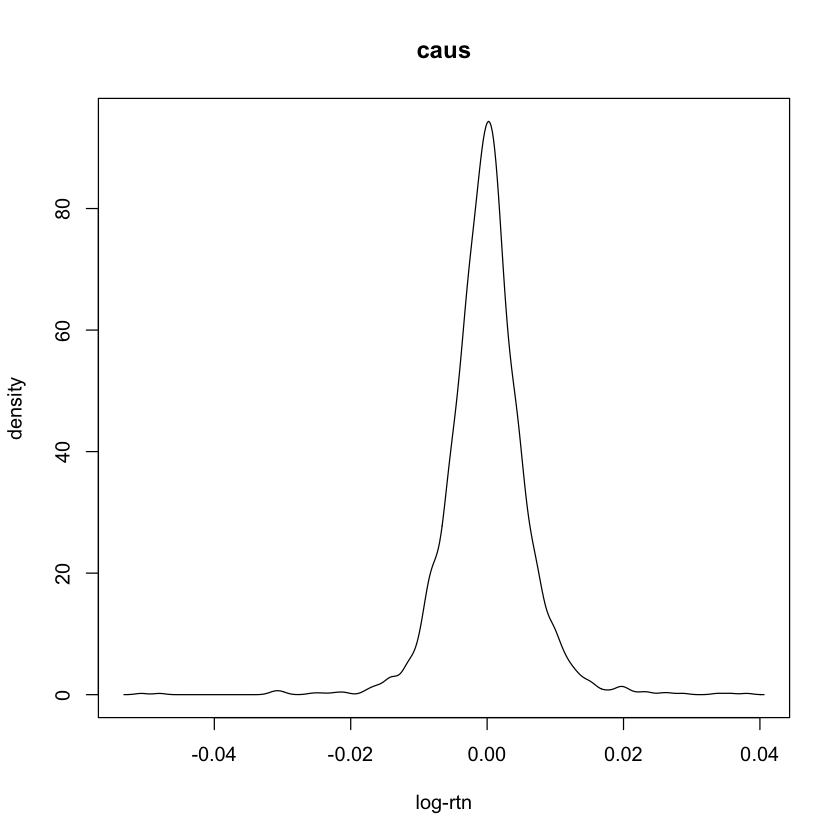

In [31]:
plot_den(diff_caus, 'caus')

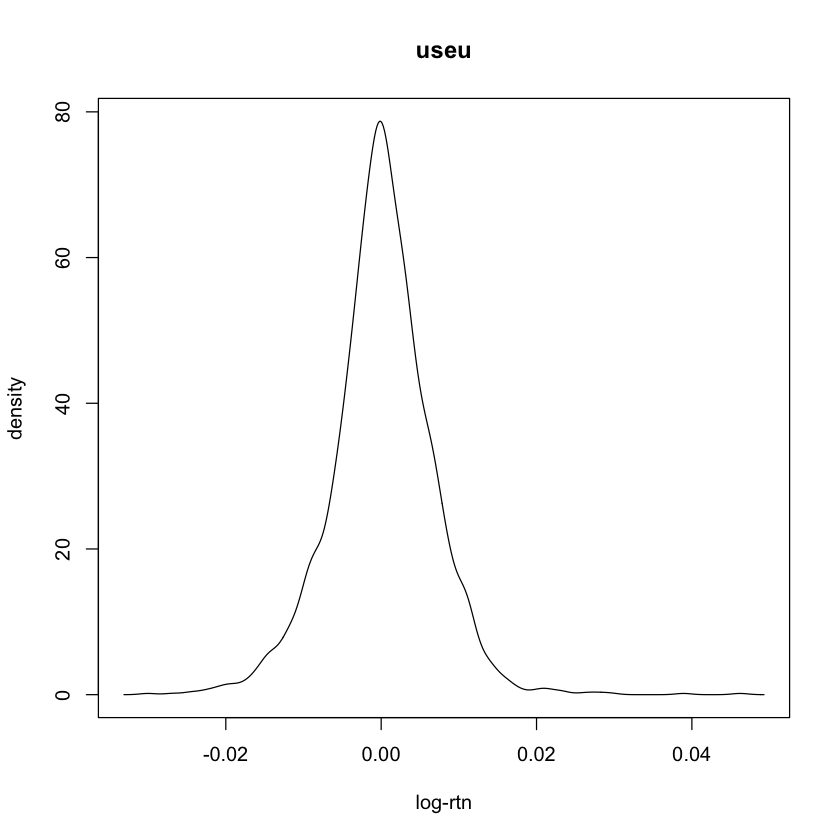

In [32]:
plot_den(diff_useu, 'useu')

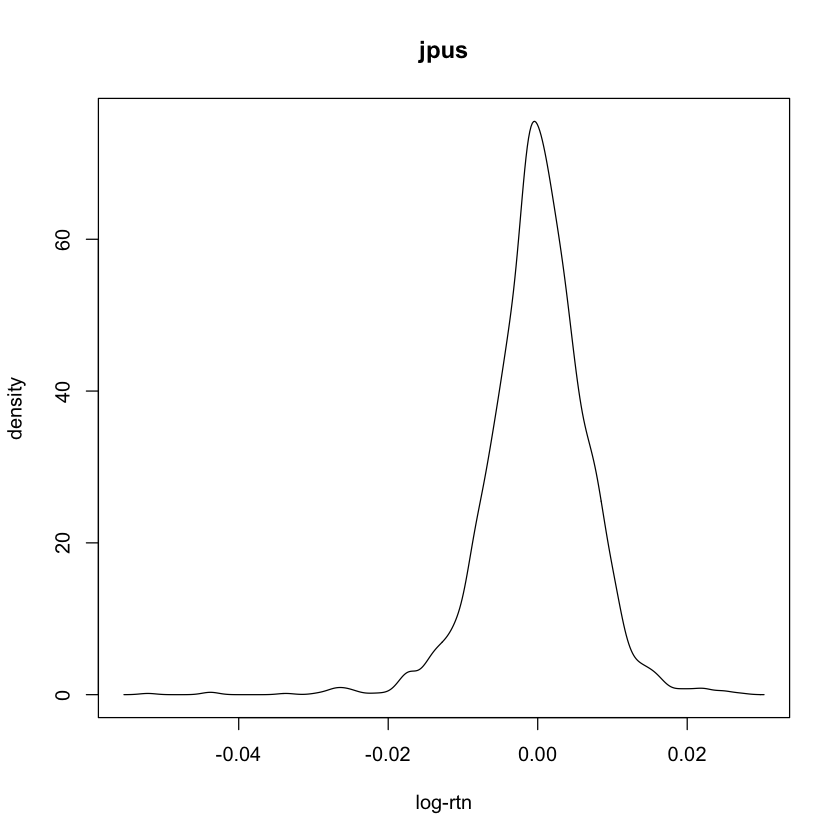

In [33]:
plot_den(diff_jpus, 'jpus')

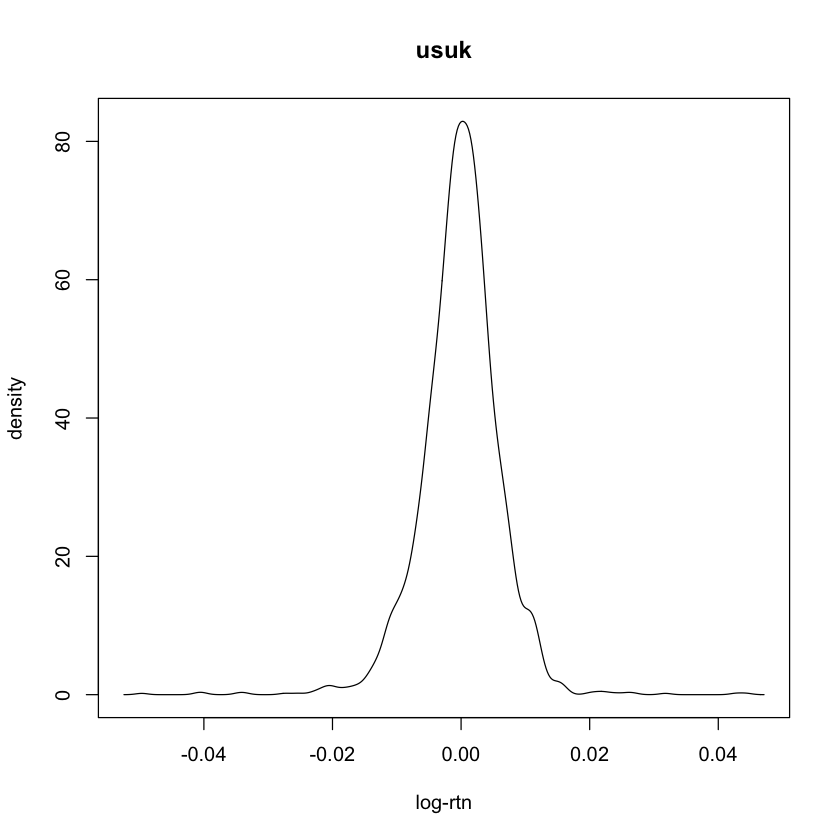

In [34]:
plot_den(diff_usuk, 'usuk')

## (d)
$$\frac{\sqrt{T}\hat{\mu}_x}{\hat{\sigma}_x}$$

In [43]:
do_t_test <- function(lrtn) {
    res = t.test(lrtn)
    p = res$p.value
    print_test_res(p, 'mean')
}

In [44]:
do_t_test(diff_caus)

p-value = 0.5761053  >  0.05 , cannot reject the null hypothesis, so that mean is zero


In [45]:
do_t_test(diff_useu)

p-value = 0.4181081  >  0.05 , cannot reject the null hypothesis, so that mean is zero


In [46]:
do_t_test(diff_jpus)

p-value = 0.8738755  >  0.05 , cannot reject the null hypothesis, so that mean is zero


In [47]:
do_t_test(diff_usuk)

p-value = 0.6539422  >  0.05 , cannot reject the null hypothesis, so that mean is zero
